In [219]:
import pandas as pd
import psycopg2
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns
import copy

%matplotlib inline

In [129]:
df_pesticide = pd.read_pickle("./pkls/has_pesticide.pkl")

In [130]:
df_pesticide.shape

(13036, 14)

<h5>Create flat results dataframe and save it</h5>

In [324]:
df_pesticide_results = pd.DataFrame()
not_included = 0
for index, row in df_pesticide.iterrows():
    #Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['pesticide_test']) is dict

    #pull out test results for this test type
    pest_results = row['coa_data']['pesticide_test']['results'] if is_dict else row['coa_data']['pesticide_test'][0]['results']
    #print(pest_results)
    
    if (type(pest_results) is not dict):
        not_included += 1
        continue
    
    #create temp df from retrieved dictionary so that it can be merged with data from other rows,
    #then keep only the row "amount"
    temp_df = pd.DataFrame.from_dict(pest_results)
    temp_df = temp_df[temp_df.index == 'amount'].reset_index()
    #print(temp_df.shape)
    
    df_pesticide_results = df_pesticide_results.append(temp_df, ignore_index=True)
    
print('not_included', not_included)
print(df_pesticide_results.shape)
print(df_pesticide_results.head())

In [9]:
temp_df

,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,Aldicarb,Azoxystrobin,Bifenazate,Bifenthrin,...,Spinosad,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin
amount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
analyte,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,Aldicarb,Azoxystrobin,Bifenazate,Bifenthrin,...,Spinosad,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin
passed,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
units,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,...,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g


In [15]:
df_pesticide_results.to_pickle('./pkls/pesticide_results.pkl')

In [25]:
df_pesticide_results = pd.read_pickle('./pkls/pesticide_results.pkl')

In [26]:
df_pesticide_results.describe()

,AFB1,AFB2,AFG1,AFG2,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,...,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin,index
count,9,9,9,9,6995,6994,6994,7008,7008,7009,...,6994,6994,7008,7008,7008,7008,7009,7008,7008,13034
unique,2,2,3,2,46,46,21,14,5,8,...,56,53,21,44,2,67,6,6,111,1
top,< 0,< 0,< 0,< 0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,amount
freq,6,6,5,6,6940,6939,6973,6940,6999,6990,...,6862,6921,6987,6909,7006,6903,6999,6976,6510,13034


In [27]:
df_pesticide_results.shape

(13034, 92)

In [28]:
df_pesticide_results.Abamectin.unique()

array([0, nan, 0.03, '<LOQ', 1.04, 0.01, 0.33, 0.06, 0.05, 2.33, 0.097,
       0.07, 8.89, 1.76, 0.8999999999999999, 0.13, 0.4, 0.57, 57.53, 0.81,
       2.44, 1.06, 0.97, 0.24, 0.02, 2.099, 0.2921, 0.0829, 1.45,
       3.5199999999999996, 0.83, 1.52, 3.81, 0.2806, 0.08, 9.24, 0.19,
       0.09, 0.11, 0.43, 0.1, 1.35, 0.12, 14.32, 1.0036,
       0.5900000000000001, 0.2369], dtype=object)

In [30]:
for amount in df_pesticide_results.Abamectin.unique():
    print(amount, len(df_pesticide_results[(df_pesticide_results['Abamectin'] == amount)].index))

0 6940
nan 0
0.03 3
<LOQ 4
1.04 2
0.01 1
0.33 1
0.06 2
0.05 2
2.33 1
0.097 1
0.07 1
8.89 1
1.76 1
0.8999999999999999 1
0.13 1
0.4 1
0.57 1
57.53 1
0.81 1
2.44 1
1.06 1
0.97 1
0.24 1
0.02 1
2.099 1
0.2921 1
0.0829 1
1.45 1
3.5199999999999996 1
0.83 1
1.52 1
3.81 1
0.2806 1
0.08 2
9.24 1
0.19 1
0.09 1
0.11 2
0.43 1
0.1 1
1.35 1
0.12 1
14.32 1
1.0036 1
0.5900000000000001 1
0.2369 1


<h5>Drop Duplicates</h5>

In [22]:
df_pesticide_results = df_pesticide_results.drop_duplicates()

In [17]:
df_pesticide_results.shape

(2695, 92)

In [23]:
df_pesticide_results.describe()

,AFB1,AFB2,AFG1,AFG2,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,...,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin,index
count,7,7,7,7,2208,2200,2200,2213,2213,2214,...,2200,2200,2213,2213,2213,2213,2214,2213,2213,2695
unique,2,2,3,2,46,46,21,14,5,8,...,56,53,21,44,2,67,6,6,111,1
top,< 0,< 0,< 0,< 0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,amount
freq,5,5,4,5,2153,2145,2179,2146,2208,2195,...,2082,2129,2192,2117,2211,2110,2204,2183,1772,2695


<h5>Validate the extraction of results from coa_data</h5>

In [ ]:
found_it = False
for index, row in df_pesticide.iterrows():
    # Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['pesticide_test']) is dict

    # Only look at dictionaries for this validation step
    if (is_dict == False):
        # Only look at coas with two entries for pesticide results
        if (len(row['coa_data']['pesticide_test']) > 1):
            if (type(row['coa_data']['pesticide_test'][0]['results']) is list):
                continue
            print('on row %i' % index)
            if found_it == False:
                print(row['coa_data'].keys())
            found_it == True
            dict1 = row['coa_data']['pesticide_test'][0]['results']
            dict2 = row['coa_data']['pesticide_test'][1]['results']
            dict3 = {**dict2 , **dict1}
            keys1 = dict1.keys()
            keys2 = dict2.keys()
            keys3 = dict2.keys()
            
            for key in keys2:
                if (key in keys1):
                    print('key', key)
                    print('amount 1', dict1[key]['amount'])
                    print('amount 2', dict2[key]['amount'])
                    print('amount 3', dict3[key]['amount'])

In [49]:
{'amount': 0, 'units': 'µg/g', 'analyte': 'Abamectin Ba'}

{'amount': 0, 'analyte': 'Abamectin Ba', 'units': 'µg/g'}

In [74]:
keys1 = ['Chlorantraniliprole', 'Spinosad A', 'Paclobutrazol', 'Dichlorvos', 'Boscalid', 'Captan', 'Bifenthrin', 'Trifloxystrobin', 'Imidacloprid', 'Kresoxim-methyl', 'Dimethoate', 'Pyridaben', 'Aldicarb', 'Tebuconazole', 'Permethrin trans', 'Spiromesifen', 'Spinosad D', 'Malathion', 'Bifenazate', 'Daminozide', 'Pyrethrins', 'Thiacloprid', 'Fenhexamid', 'Spinosad', 'Oxamyl', 'Dimethomorph', 'Imazalil', 'Methyl parathion', 'Fenpyroximate', 'Flonicamid', 'Naled', 'Spinetoram', 'Chlorfenapyr', 'Fludioxonil', 'Abamectin', 'Mevinphos', 'Cyfluthrin', 'Myclobutanil', 'Abamectin Ba', 'Mevinphos I', 'Propoxur', 'Etofenprox', 'Abamectin Bb', 'Methiocarb', 'Dimethomorph I', 'Prallethrin', 'Carbofuran', 'Methomyl', 'Pyrethrins Pyrethrin I', 'Acephate', 'Etoxazole', 'Diazinon', 'Chlordane', 'Chlordane cis', 'Chlorpyrifos', 'Spirotetramat', 'Malathion A', 'Metalaxyl', 'Ethoprophos', 'Acequinocyl', 'Piperonylbutoxide', 'Clofentezine', 'Chlordane trans', 'Mevinphos II', 'Acetamiprid', 'Fipronil', 'Coumaphos', 'Dimethomorph II', 'Carbaryl', 'Permethrin', 'Permethrin cis', 'Propiconazole', 'Fenoxycarb', 'Cypermethrin', 'Azoxystrobin', 'Thiamethoxam', 'Hexythiazox', 'Phosmet', 'Spiroxamine', 'Pentachloronitrobenzene']
keys2 = ['Chlordane', 'Chlorfenapyr', 'Dichlorvos', 'Chlordane cis', 'Captan', 'Chlordane trans', 'Cypermethrin', 'Chlorpyrifos', 'Methyl parathion', 'Pentachloronitrobenzene', 'Cyfluthrin']
keys3 = ['Chlorantraniliprole', 'Etoxazole', 'Paclobutrazol', 'Dichlorvos', 'Boscalid', 'Captan', 'Bifenthrin', 'Trifloxystrobin', 'Imidacloprid', 'Kresoxim-methyl', 'Dimethoate', 'Pyridaben', 'Hexythiazox', 'Tebuconazole', 'Permethrin trans', 'Spiromesifen', 'Spinosad D', 'Azoxystrobin', 'Malathion', 'Bifenazate', 'Daminozide', 'Pyrethrins', 'Thiacloprid', 'Fenhexamid', 'Spinosad', 'Oxamyl', 'Dimethomorph', 'Imazalil', 'Methyl parathion', 'Fenpyroximate', 'Flonicamid', 'Naled', 'Spinetoram', 'Chlorfenapyr', 'Fludioxonil', 'Abamectin', 'Mevinphos', 'Cyfluthrin', 'Myclobutanil', 'Abamectin Ba', 'Mevinphos I', 'Propoxur', 'Etofenprox', 'Abamectin Bb', 'Methiocarb', 'Dimethomorph I', 'Prallethrin', 'Carbofuran', 'Methomyl', 'Pyrethrins Pyrethrin I', 'Acephate', 'Spinosad A', 'Diazinon', 'Chlordane', 'Chlordane cis', 'Chlorpyrifos', 'Spirotetramat', 'Malathion A', 'Metalaxyl', 'Ethoprophos', 'Acequinocyl', 'Piperonylbutoxide', 'Clofentezine', 'Chlordane trans', 'Mevinphos II', 'Acetamiprid', 'Fipronil', 'Coumaphos', 'Dimethomorph II', 'Carbaryl', 'Permethrin', 'Permethrin cis', 'Propiconazole', 'Spiroxamine', 'Cypermethrin', 'Aldicarb', 'Thiamethoxam', 'Phosmet', 'Fenoxycarb', 'Pentachloronitrobenzene']

for key in keys2:
    print(key, key in keys1)

Chlordane True
Chlorfenapyr True
Dichlorvos True
Chlordane cis True
Captan True
Chlordane trans True
Cypermethrin True
Chlorpyrifos True
Methyl parathion True
Pentachloronitrobenzene True
Cyfluthrin True


In [71]:
this_dict0 =  {'Abamectin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin'}, 'Mevinphos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos'}, 'Chlorfenapyr': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorfenapyr'}, 'Myclobutanil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Myclobutanil'}, 'Methyl parathion': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methyl parathion'}, 'Mevinphos I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos I'}, 'Cyfluthrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cyfluthrin'}, 'Propoxur': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Propoxur'}, 'Phosmet': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Phosmet'}, 'Etofenprox': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Etofenprox'}, 'Chlorantraniliprole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorantraniliprole'}, 'Abamectin Bb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin Bb'}, 'Methiocarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methiocarb'}, 'Etoxazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Etoxazole'}, 'Paclobutrazol': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Paclobutrazol'}, 'Dimethomorph I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph I'}, 'Dichlorvos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dichlorvos'}, 'Imidacloprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Imidacloprid'}, 'Boscalid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Boscalid'}, 'Chlordane': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane'}, 'Spiroxamine': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spiroxamine'}, 'Pyrethrins': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyrethrins'}, 'Prallethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Prallethrin'}, 'Carbofuran': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Carbofuran'}, 'Captan': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Captan'}, 'Methomyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methomyl'}, 'Pyrethrins Pyrethrin I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyrethrins Pyrethrin I'}, 'Bifenthrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Bifenthrin'}, 'Trifloxystrobin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Trifloxystrobin'}, 'Naled': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Naled'}, 'Spinosad A': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad A'}, 'Diazinon': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Diazinon'}, 'Carbaryl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Carbaryl'}, 'Kresoxim-methyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Kresoxim-methyl'}, 'Azoxystrobin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Azoxystrobin'}, 'Chlorpyrifos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorpyrifos'}, 'Dimethoate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethoate'}, 'Spirotetramat': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spirotetramat'}, 'Pyridaben': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyridaben'}, 'Metalaxyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Metalaxyl'}, 'Ethoprophos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Ethoprophos'}, 'Acequinocyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acequinocyl'}, 'Tebuconazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Tebuconazole'}, 'Piperonylbutoxide': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Piperonylbutoxide'}, 'Permethrin trans': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin trans'}, 'Clofentezine': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Clofentezine'}, 'Spiromesifen': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spiromesifen'}, 'Chlordane trans': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane trans'}, 'Mevinphos II': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos II'}, 'Spinosad D': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad D'}, 'Acetamiprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acetamiprid'}, 'Malathion': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Malathion'}, 'Fipronil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fipronil'}, 'Coumaphos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Coumaphos'}, 'Bifenazate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Bifenazate'}, 'Dimethomorph II': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph II'}, 'Daminozide': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Daminozide'}, 'Acephate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acephate'}, 'Permethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin'}, 'Fenhexamid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenhexamid'}, 'Spinosad': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad'}, 'Permethrin cis': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin cis'}, 'Propiconazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Propiconazole'}, 'Oxamyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Oxamyl'}, 'Dimethomorph': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph'}, 'Malathion A': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Malathion A'}, 'Cypermethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cypermethrin'}, 'Abamectin Ba': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin Ba'}, 'Fenpyroximate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenpyroximate'}, 'Flonicamid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Flonicamid'}, 'Thiacloprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Thiacloprid'}, 'Chlordane cis': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane cis'}, 'Aldicarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Aldicarb'}, 'Thiamethoxam': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Thiamethoxam'}, 'Imazalil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Imazalil'}, 'Spinetoram': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinetoram'}, 'Hexythiazox': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Hexythiazox'}, 'Fenoxycarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenoxycarb'}, 'Pentachloronitrobenzene': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pentachloronitrobenzene'}, 'Fludioxonil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fludioxonil'}}
this_dict1 = {'Chlordane': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane'}, 'Chlorfenapyr': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorfenapyr'}, 'Dichlorvos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dichlorvos'}, 'Chlordane cis': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane cis'}, 'Captan': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Captan'}, 'Chlordane trans': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane trans'}, 'Cypermethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cypermethrin'}, 'Chlorpyrifos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorpyrifos'}, 'Methyl parathion': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methyl parathion'}, 'Pentachloronitrobenzene': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pentachloronitrobenzene'}, 'Cyfluthrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cyfluthrin'}}
this_dict3 = {'Chlorantraniliprole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorantraniliprole'}, 'Spinosad A': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad A'}, 'Paclobutrazol': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Paclobutrazol'}, 'Dichlorvos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dichlorvos'}, 'Boscalid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Boscalid'}, 'Captan': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Captan'}, 'Bifenthrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Bifenthrin'}, 'Trifloxystrobin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Trifloxystrobin'}, 'Imidacloprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Imidacloprid'}, 'Kresoxim-methyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Kresoxim-methyl'}, 'Dimethoate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethoate'}, 'Pyridaben': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyridaben'}, 'Aldicarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Aldicarb'}, 'Tebuconazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Tebuconazole'}, 'Permethrin trans': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin trans'}, 'Spiromesifen': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spiromesifen'}, 'Spinosad D': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad D'}, 'Malathion': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Malathion'}, 'Bifenazate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Bifenazate'}, 'Daminozide': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Daminozide'}, 'Pyrethrins': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyrethrins'}, 'Thiacloprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Thiacloprid'}, 'Fenhexamid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenhexamid'}, 'Spinosad': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinosad'}, 'Oxamyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Oxamyl'}, 'Dimethomorph': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph'}, 'Imazalil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Imazalil'}, 'Methyl parathion': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methyl parathion'}, 'Fenpyroximate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenpyroximate'}, 'Flonicamid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Flonicamid'}, 'Naled': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Naled'}, 'Spinetoram': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spinetoram'}, 'Chlorfenapyr': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorfenapyr'}, 'Fludioxonil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fludioxonil'}, 'Abamectin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin'}, 'Mevinphos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos'}, 'Cyfluthrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cyfluthrin'}, 'Myclobutanil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Myclobutanil'}, 'Abamectin Ba': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin Ba'}, 'Mevinphos I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos I'}, 'Propoxur': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Propoxur'}, 'Etofenprox': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Etofenprox'}, 'Abamectin Bb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Abamectin Bb'}, 'Methiocarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methiocarb'}, 'Dimethomorph I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph I'}, 'Prallethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Prallethrin'}, 'Carbofuran': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Carbofuran'}, 'Methomyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Methomyl'}, 'Pyrethrins Pyrethrin I': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pyrethrins Pyrethrin I'}, 'Acephate': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acephate'}, 'Etoxazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Etoxazole'}, 'Diazinon': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Diazinon'}, 'Chlordane': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane'}, 'Chlordane cis': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane cis'}, 'Chlorpyrifos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlorpyrifos'}, 'Spirotetramat': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spirotetramat'}, 'Malathion A': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Malathion A'}, 'Metalaxyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Metalaxyl'}, 'Ethoprophos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Ethoprophos'}, 'Acequinocyl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acequinocyl'}, 'Piperonylbutoxide': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Piperonylbutoxide'}, 'Clofentezine': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Clofentezine'}, 'Chlordane trans': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Chlordane trans'}, 'Mevinphos II': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Mevinphos II'}, 'Acetamiprid': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Acetamiprid'}, 'Fipronil': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fipronil'}, 'Coumaphos': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Coumaphos'}, 'Dimethomorph II': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Dimethomorph II'}, 'Carbaryl': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Carbaryl'}, 'Permethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin'}, 'Permethrin cis': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Permethrin cis'}, 'Propiconazole': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Propiconazole'}, 'Fenoxycarb': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Fenoxycarb'}, 'Cypermethrin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Cypermethrin'}, 'Azoxystrobin': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Azoxystrobin'}, 'Thiamethoxam': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Thiamethoxam'}, 'Hexythiazox': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Hexythiazox'}, 'Phosmet': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Phosmet'}, 'Spiroxamine': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Spiroxamine'}, 'Pentachloronitrobenzene': {'amount': 0, 'units': 'µg/g', 'passed': True, 'detection_limits': {'LOQ': {'amount': 0.05, 'units': 'µg/g'}, 'LOD': {'amount': 0.03, 'units': 'µg/g'}}, 'analyte': 'Pentachloronitrobenzene'}}

In [72]:
for key in keys1:
    print(this_dict0[key]['amount'])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [73]:
for key in keys2:
    print(this_dict1[key]['amount'])

0
0
0
0
0
0
0
0
0
0
0


In [213]:
df_pesticide2 = pd.read_pickle("./pkls/has_pesticide2.pkl")

In [229]:
def mergeAnalyteDict(dict1, dict2):
    #Merge dictionaries and keep non-zero values over zeros
    dict0 = {**dict2 , **dict1}
    dict3 = copy.deepcopy(dict0)
    for key, value in dict3.items():
        if (key in dict1 and key in dict2):
            #print(key)
            if (dict3[key]['amount'] == dict2[key]['amount']):
                continue
            elif (type(dict3[key]['amount']) is str and dict2[key]['amount'] == 0):
                continue
            elif (dict3[key]['amount'] == 0 and type(dict2[key]['amount']) is str):
                dict3[key]['amount'] = dict2[key]['amount']
                continue
            elif (dict3[key]['amount'] > dict2[key]['amount']):
                continue
            elif (dict3[key]['amount'] < dict2[key]['amount']):
                dict3[key]['amount'] = dict2[key]['amount']
            else: continue

    return dict3
            
    

In [208]:
def mergeDict(dict1, dict2):
    #Merge dictionaries and keep non-zero values over zeros
    dict3 = {**dict2 , **dict1}
    for key, value in dict3.items():
        if (key in dict1 and key in dict2):
            print(key)
            dict3[key] = [value , dict1[key]]
            print(dict3)
    return dict3

In [135]:
found_it = False
coa_ids_of_interest = []
dict3 = {}
dict2 = {}
dict1 = {}
for index, row in df_pesticide2.iterrows():
    dict3.clear()
    dict2.clear()
    dict1.clear()
    # Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['pesticide_test']) is dict

    # Only look at dictionaries for this validation step
    if (is_dict == False):
        # Only look at coas with two entries for pesticide results
        if (len(row['coa_data']['pesticide_test']) > 1):
            if (type(row['coa_data']['pesticide_test'][0]['results']) is list):
                continue
            #print('on row %i' % index)
#             if found_it == False:
#                 print(row['coa_data'].keys())
#             found_it == True
            dict1 = row['coa_data']['pesticide_test'][0]['results']
            dict2 = row['coa_data']['pesticide_test'][1]['results']
            #dict3 = mergeAnalyteDict(dict1, dict2)
            #dict3 = mergeAnalyteDict(dict2, dict1)

            dict3 = {**dict2 , **dict1}
            keys1 = dict1.keys()
            keys2 = dict2.keys()
            keys3 = dict3.keys()

            if (len(keys3) != (len(keys1)+len(keys2))):
                print(index)
                for key in keys2:
                    if (key in keys1):
                        if (dict1[key]['amount'] != dict2[key]['amount']):
                            print('key', key)
                            print('amount 1', dict1[key]['amount'])
                            print('amount 2', dict2[key]['amount'])
                            print('amount 3', dict3[key]['amount'])


In [234]:
df_pesticide_results = pd.DataFrame()
list_not_included = []
not_included = 0
for index, row in df_pesticide.iterrows():
    #Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['pesticide_test']) is dict

    #pull out test results for this test type
    if is_dict:
        pest_results = row['coa_data']['pesticide_test']['results']
    elif (len(row['coa_data']['pesticide_test']) == 1):
        pest_results = row['coa_data']['pesticide_test'][0]['results']
    else:
        dict1 = row['coa_data']['pesticide_test'][0]['results']
        dict2 = row['coa_data']['pesticide_test'][1]['results']
        if (type(dict1) is not dict or type(dict2) is not dict):
            not_included += 1
            list_not_included.append(index)
            continue
            
        else: pest_results = mergeAnalyteDict(dict1, dict2)
        
    #print(pest_results)
    
    if (type(pest_results) is not dict):
        not_included += 1
        list_not_included.append(index)
        continue
    
    #create temp df from retrieved dictionary so that it can be merged with data from other rows,
    #then keep only the row "amount"
    temp_df = pd.DataFrame.from_dict(pest_results)
    temp_df = temp_df[temp_df.index == 'amount'].reset_index()
    #print(temp_df.shape)
    
    df_pesticide_results = df_pesticide_results.append(temp_df, ignore_index=True)
    
print('not_included', not_included)
print('list of indices not included', list_not_included)
print(df_pesticide_results.shape)
print(df_pesticide_results.head())

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


not_included 2
(13034, 92)
  AFB1 AFB2 AFG1 AFG2 Abamectin Abamectin Ba Abamectin Bb Acephate  \
0  NaN  NaN  NaN  NaN         0            0            0        0   
1  NaN  NaN  NaN  NaN         0            0            0        0   
2  NaN  NaN  NaN  NaN         0            0            0        0   
3  NaN  NaN  NaN  NaN         0            0            0        0   
4  NaN  NaN  NaN  NaN         0            0            0        0   

  Acequinocyl Acetamiprid   ...   Spinosad A Spinosad D Spiromesifen  \
0           0           0   ...            0          0            0   
1           0           0   ...            0          0            0   
2           0           0   ...            0          0            0   
3           0           0   ...            0          0            0   
4           0           0   ...            0          0            0   

  Spirotetramat Spiroxamine Tebuconazole Thiacloprid Thiamethoxam  \
0             0           0            0          

In [230]:
for index, row in df_pesticide2.iterrows():
    #if (index == 10175):
    # Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['pesticide_test']) is dict

    # Only look at dictionaries for this validation step
    if (is_dict == False):
        # Only look at coas with two entries for pesticide results
        if (len(row['coa_data']['pesticide_test']) > 1):
            if (type(row['coa_data']['pesticide_test'][0]['results']) is list):
                continue
            dict1 = row['coa_data']['pesticide_test'][0]['results']
            dict2 = row['coa_data']['pesticide_test'][1]['results']
            dict3 = mergeAnalyteDict(dict1, dict2)
#             dict3 = mergeAnalyteDict(dict2, dict1)

            #dict3 = {**dict2 , **dict1}
            keys1 = dict1.keys()
            keys2 = dict2.keys()
            keys3 = dict3.keys()

            #if (len(keys3) != (len(keys1)+len(keys2))):
            for key in keys2:
                #print(key, key in keys1)
                if (key in keys1):
                    #print(key, dict1[key]['amount'] != dict2[key]['amount'])
                    if (dict1[key]['amount'] != dict2[key]['amount']):
                        print(index)
                        print('key', key)
                        print('amount 1', dict1[key]['amount'])
                        print('amount 2', dict2[key]['amount'])
                        print('amount 3', dict3[key]['amount'])

758
key Chlorfenapyr
amount 1 0.22
amount 2 0
amount 3 0.22
4991
key Chlorpyrifos
amount 1 0.68
amount 2 0
amount 3 0.68
5020
key Chlorpyrifos
amount 1 0.5
amount 2 0
amount 3 0.5
5021
key Chlorpyrifos
amount 1 0.66
amount 2 0
amount 3 0.66
7305
key Cyfluthrin
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7305
key Captan
amount 1 0.19
amount 2 0
amount 3 0.19
7326
key Permethrin
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7326
key Permethrin cis
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7347
key Methyl parathion
amount 1 0
amount 2 < 0
amount 3 < 0
7349
key Permethrin
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7349
key Permethrin cis
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7350
key Permethrin
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7350
key Permethrin cis
amount 1 <LOQ
amount 2 0
amount 3 <LOQ
7350
key Methyl parathion
amount 1 0
amount 2 < 0
amount 3 < 0
7354
key Permethrin
amount 1 0.05
amount 2 0
amount 3 0.05
7354
key Permethrin cis
amount 1 0.05
amount 2 0
amount 3 0.05
7354
key Methyl parathion
amoun

In [224]:
print(dict3['Permethrin'])
print(dict2['Permethrin'])
print(dict1['Permethrin'])


{'amount': 0.03, 'units': 'µg/g', 'passed': True, 'analyte': 'Permethrin'}
{'amount': 0.03, 'units': 'µg/g', 'passed': True, 'analyte': 'Permethrin'}
{'amount': 0, 'units': 'µg/g', 'passed': True, 'analyte': 'Permethrin'}


In [196]:
this_dict = df_pesticide2.loc[[10175]]['coa_data']

In [235]:
df_pesticide_results.to_pickle('./pkls/pesticide_results.pkl')

In [236]:
df_pesticide_results.describe()

,AFB1,AFB2,AFG1,AFG2,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,...,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin,index
count,9,9,9,9,12856,12871,12871,12883,12886,12887,...,12871,12871,12886,12886,12886,12886,12887,12886,12886,13034
unique,2,2,3,2,64,65,25,20,6,11,...,70,62,26,47,2,93,6,6,133,1
top,< 0,< 0,< 0,< 0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,amount
freq,6,6,5,6,12773,12788,12844,12799,12875,12864,...,12700,12781,12859,12776,12884,12725,12877,12853,12233,13034


In [237]:
df_pesticide_results.dtypes

AFB1                       object
AFB2                       object
AFG1                       object
AFG2                       object
Abamectin                  object
Abamectin Ba               object
Abamectin Bb               object
Acephate                   object
Acequinocyl                object
Acetamiprid                object
Aldicarb                   object
Azoxystrobin               object
Bifenazate                 object
Bifenthrin                 object
Boscalid                   object
Captan                     object
Carbaryl                   object
Carbofuran                 object
Chlorantraniliprole        object
Chlordane                  object
Chlordane cis              object
Chlordane trans            object
Chlorfenapyr               object
Chlorpyrifos               object
Clofentezine               object
Coumaphos                  object
Cyfluthrin                 object
Cypermethrin               object
Daminozide                 object
Diazinon      

In [281]:
for column in df_pesticide_results.columns:
    df_pesticide_results[column].replace(['<LOQ', '< LOQ', '<lOQ', '< 0', '<LOD', '>LOQ', '< LOD', '0'], 0, inplace=True)

In [258]:
df_pesticide_results.dtypes

AFB1                       float64
AFB2                       float64
AFG1                       float64
AFG2                       float64
Abamectin                  float64
Abamectin Ba               float64
Abamectin Bb               float64
Acephate                   float64
Acequinocyl                float64
Acetamiprid                float64
Aldicarb                   float64
Azoxystrobin               float64
Bifenazate                  object
Bifenthrin                  object
Boscalid                   float64
Captan                     float64
Carbaryl                   float64
Carbofuran                 float64
Chlorantraniliprole        float64
Chlordane                   object
Chlordane cis               object
Chlordane trans             object
Chlorfenapyr                object
Chlorpyrifos               float64
Clofentezine               float64
Coumaphos                  float64
Cyfluthrin                 float64
Cypermethrin                object
Daminozide          

In [251]:
df_pesticide_results.Bifenazate.unique()

array([0, 2.9207, 10.1, 4.3, 0.04, nan, 0.07, 0.13, 2.08, 0.067, 0.42,
       29.76, 0.168, 0.37, 0.09, 103.92, 33.3347, 14.0269, 13.212, 0.31,
       2.72, 0.06, 0.46, 1.7, 0.57, 0.28, 0.03, 4.98, 1.24, 5.4215,
       31.8955, 0.5, 0.14, 0.56, 0.36, 0.0158, 0.0163, 0.302, 69.51, 0.24,
       0.54, 0.0525, 9.9436, 17.7154, 3.3415, 25.4029, 14.2437, 0.094,
       0.093, 0.1, 0.52, 5.274, 0.388, 0.33, 0.05, 1.29, 0.41, 2.61, 0.82,
       0.2354, 0.98, 0.93, 4.83, 0.11, 0.95, 8.58, 0.08, 0.55, 1.19, 1.5,
       1.32, 1.37, 1.99, 1.73, 1.98, 1.68, 0.39, 0.12, 7.8261, 3.662, 0.59,
       2.33, 2.131, 0.17, 3.53, 0.65, 3.19, 0.83, 0.0995, 0.32, 0.58,
       0.2884, 11.85, 0.22, 0.99, 2.1806, 0.141, 1.05, 1.57, 0.0628, 9.34,
       1.61, 1.47, 4.9043, 2.12, 1.09, 1.35, 0.43, 0.3992, 14.4536, 3.11,
       1.27, 0.45, 4.44, 1.94, 3.69, 1.74, 0.79, 17.19, 1.52, 0.27, 4.29,
       9.67, 0.91, 0.35, 3.74, 2.76, 0.2, 1.03, 6.01, 12.16, 0.34, 1.17,
       0.01, 1.95, 0.16, 4.7, 0.18, 1.42, 0.51, 4.1

In [253]:
#print(df_pesticide_results[(df_pesticide_results['Bifenazate'] == '>5')].index)
df_pesticide_results = df_pesticide_results.drop(df_pesticide_results[(df_pesticide_results['Bifenazate'] == '>5')].index)

In [259]:
df_pesticide_results.Bifenazate = df_pesticide_results.Bifenazate.astype('float64')

In [283]:
df_pesticide_results.dtypes

AFB1                       float64
AFB2                       float64
AFG1                       float64
AFG2                       float64
Abamectin                  float64
Abamectin Ba               float64
Abamectin Bb               float64
Acephate                   float64
Acequinocyl                float64
Acetamiprid                float64
Aldicarb                   float64
Azoxystrobin               float64
Bifenazate                 float64
Bifenthrin                 float64
Boscalid                   float64
Captan                     float64
Carbaryl                   float64
Carbofuran                 float64
Chlorantraniliprole        float64
Chlordane                   object
Chlordane cis               object
Chlordane trans             object
Chlorfenapyr               float64
Chlorpyrifos               float64
Clofentezine               float64
Coumaphos                  float64
Cyfluthrin                 float64
Cypermethrin               float64
Daminozide          

In [262]:
df_pesticide_results = df_pesticide_results.drop(df_pesticide_results[(df_pesticide_results['Bifenthrin'] == '>5')].index)
df_pesticide_results.Bifenthrin = df_pesticide_results.Bifenthrin.astype('float64')

In [274]:
df_pesticide_results['Chlorfenapyr'].astype('float64').describe()
df_pesticide_results['Chlorfenapyr'].describe()

count    13003.000000
mean         0.147114
std          3.147606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        173.040000
Name: Chlorfenapyr, dtype: float64

In [282]:
df_pesticide_results.Diazinon.unique()
#df_pesticide_results['Chlorfenapyr'].unique()
#df_pesticide_results.dtypes

array([  0.00000000e+00,              nan,   5.00000000e-02,
         1.50000000e-01,   6.30000000e-02,   2.40000000e-01,
         5.93821000e+01,   1.00000000e-02,   8.00000000e-02,
         7.00000000e-02,   1.20000000e-01,   4.80000000e-01,
         9.70000000e-01,   6.00000000e-02,   1.00000000e-01,
         1.10000000e-01])

In [284]:
df_pesticide_results = df_pesticide_results.drop('index', axis=1)
#df_pesticide_results.astype('float64')

In [296]:
df_pesticide_results.Etofenprox.unique()
df_pesticide_results.Etofenprox = df_pesticide_results.Etofenprox.astype('float64')

In [291]:
for column in df_pesticide_results.columns:
    df_pesticide_results[column].replace(['NT'], np.nan, inplace=True)

In [298]:
df_pesticide_results.dtypes

AFB1                       float64
AFB2                       float64
AFG1                       float64
AFG2                       float64
Abamectin                  float64
Abamectin Ba               float64
Abamectin Bb               float64
Acephate                   float64
Acequinocyl                float64
Acetamiprid                float64
Aldicarb                   float64
Azoxystrobin               float64
Bifenazate                 float64
Bifenthrin                 float64
Boscalid                   float64
Captan                     float64
Carbaryl                   float64
Carbofuran                 float64
Chlorantraniliprole        float64
Chlordane                  float64
Chlordane cis              float64
Chlordane trans            float64
Chlorfenapyr               float64
Chlorpyrifos               float64
Clofentezine               float64
Coumaphos                  float64
Cyfluthrin                 float64
Cypermethrin               float64
Daminozide          

In [299]:
df_pesticide_results.describe()

,AFB1,AFB2,AFG1,AFG2,Abamectin,Abamectin Ba,Abamectin Bb,Acephate,Acequinocyl,Acetamiprid,...,Spinosad,Spinosad A,Spinosad D,Spiromesifen,Spirotetramat,Spiroxamine,Tebuconazole,Thiacloprid,Thiamethoxam,Trifloxystrobin
count,9.0,9.0,9.000000,9.0,12853.000000,12868.000000,12868.000000,12880.00000,12883.000000,12884.000000,...,12853.000000,12868.000000,12868.000000,12883.000000,12883.000000,12883.0,12883.000000,12884.000000,12883.000000,12877.000000
mean,0.0,0.0,26.677778,0.0,0.010996,0.007140,0.003843,0.00043,0.000545,0.000075,...,0.019041,0.006473,0.012546,0.008084,0.006310,0.0,0.010466,0.000236,0.000006,0.045526
std,0.0,0.0,80.033333,0.0,0.551767,0.332473,0.228541,0.02694,0.058644,0.003823,...,0.637000,0.206737,0.465892,0.310176,0.314557,0.0,0.264136,0.026431,0.000449,0.824613
min,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,240.100000,0.0,57.530000,33.330000,24.200000,2.78100,6.650000,0.330000,...,53.050000,14.590600,39.220000,22.270000,25.820000,0.0,17.550000,3.000000,0.040000,28.710000


In [300]:
df_pesticide_results.to_pickle('./pkls/cleaned_pesticide_results.pkl')

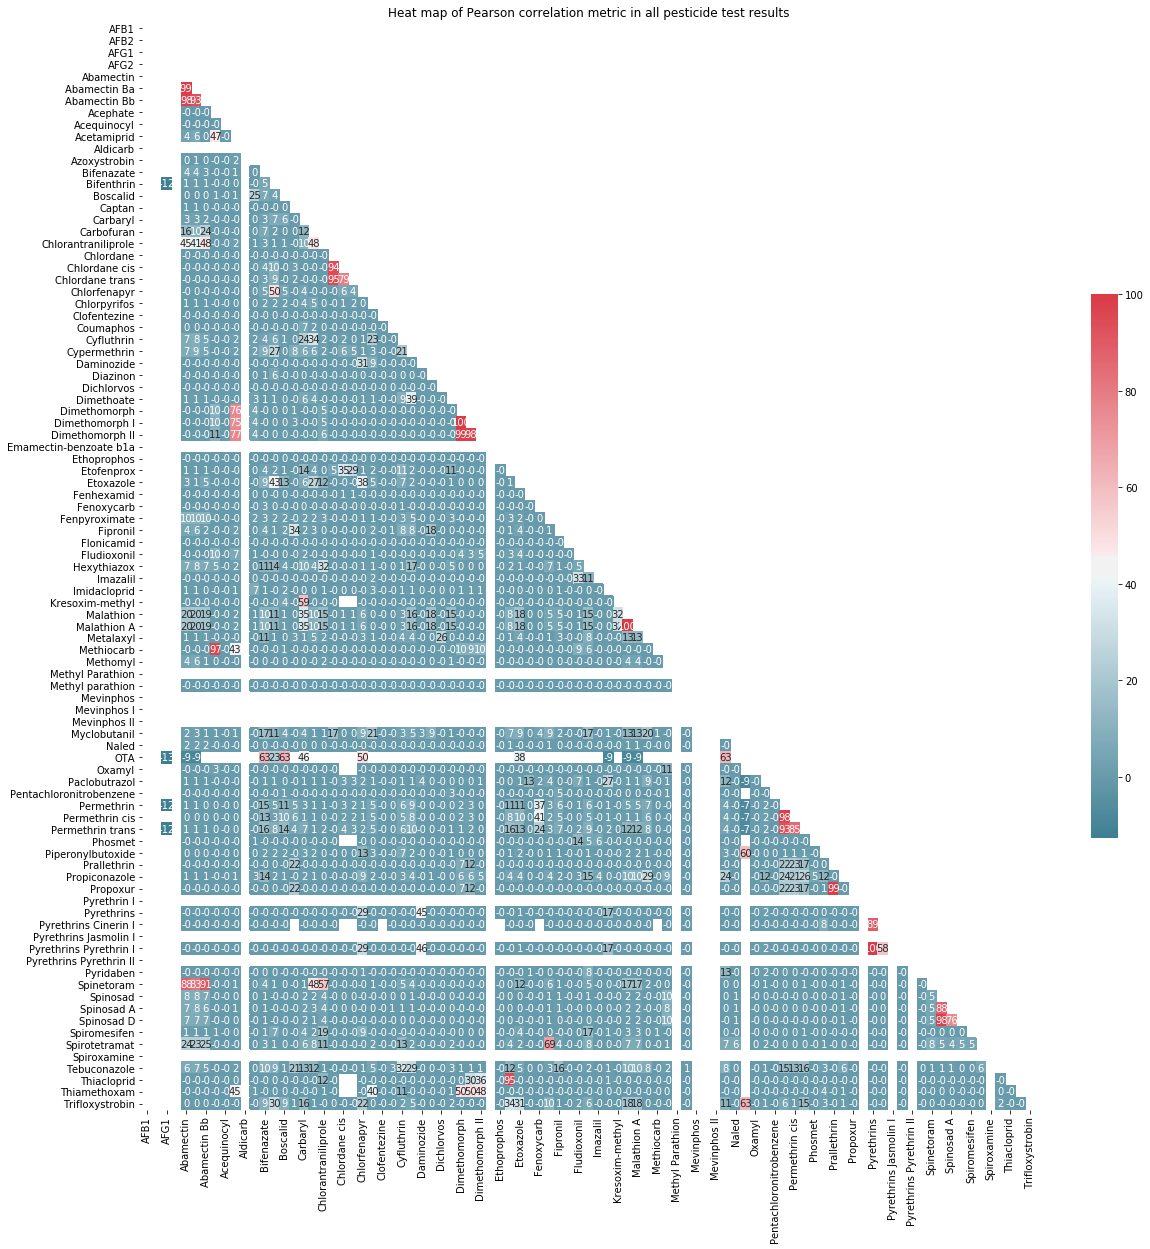

In [317]:
correlations = df_pesticide_results.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#plt.figure(figsize=(20,20))
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Heat map of Pearson correlation metric in all pesticide test results')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cmap=cmap, cbar_kws={"shrink": .5})

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(20, 20))



# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask, cmap=cmap, cbar=False)


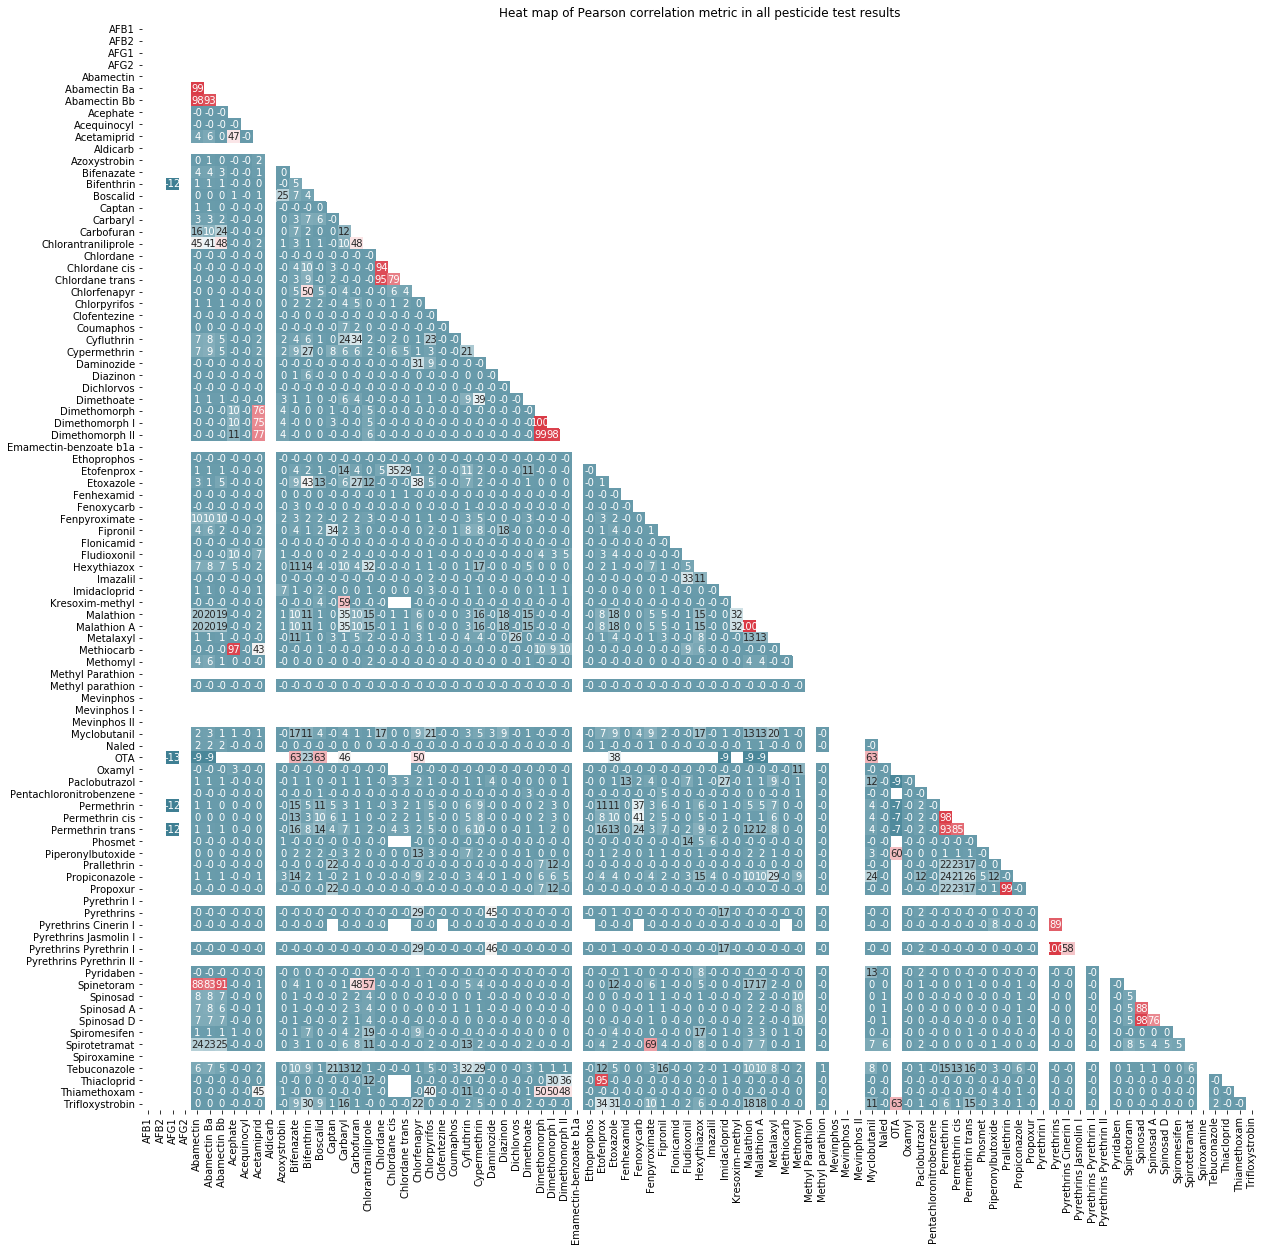

In [318]:
plt.figure(figsize=(20,20))
plt.title('Heat map of Pearson correlation metric in all pesticide test results')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cmap=cmap, cbar=False)

In [322]:
df_pesticide_results.Spiroxamine.unique()

array([0, nan], dtype=object)

In [325]:
for column in df_pesticide_results.columns:
    print(column)

Abamectin
Abamectin Ba
Abamectin Bb
Acephate
Acequinocyl
Acetamiprid
Aldicarb
Azoxystrobin
Bifenazate
Bifenthrin
Boscalid
Captan
Carbaryl
Carbofuran
Chlorantraniliprole
Chlordane
Chlordane cis
Chlordane trans
Chlorfenapyr
Chlorpyrifos
Clofentezine
Coumaphos
Cyfluthrin
Cypermethrin
Daminozide
Diazinon
Dichlorvos
Dimethoate
Dimethomorph
Dimethomorph I
Dimethomorph II
Ethoprophos
Etofenprox
Etoxazole
Fenhexamid
Fenoxycarb
Fenpyroximate
Fipronil
Flonicamid
Fludioxonil
Hexythiazox
Imazalil
Imidacloprid
Kresoxim-methyl
Malathion
Malathion A
Metalaxyl
Methiocarb
Methomyl
Methyl parathion
Mevinphos
Mevinphos I
Mevinphos II
Myclobutanil
Naled
Oxamyl
Paclobutrazol
Pentachloronitrobenzene
Permethrin
Permethrin cis
Permethrin trans
Phosmet
Piperonylbutoxide
Prallethrin
Propiconazole
Propoxur
Pyrethrins
Pyrethrins Cinerin I
Pyrethrins Jasmolin I
Pyrethrins Pyrethrin I
Pyridaben
Spinetoram
Spinosad
Spinosad A
Spinosad D
Spiromesifen
Spirotetramat
Spiroxamine
Tebuconazole
Thiacloprid
Thiamethoxam
Tri